In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.plotly as py
from matplotlib import style

%matplotlib inline

In [2]:
FILE_NAME = 'data.csv'

In [3]:
df = pd.read_csv(FILE_NAME)
df.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


In [4]:
plt.scatter(X, y)
plt.set_xlabel()
plt.show();

NameError: name 'X' is not defined

In [25]:
print(np.sum((predict(X, teta) - y) * X))

-13989660610


In [10]:
teta = np.zeros(2)
print(teta.copy())

[0. 0.]


In [23]:
def predict(x, theta):
    return np.dot(x, theta)

def calculate_cost(x, theta, y):
    prediction = predict(x, theta)
    return ((prediction - y)**2).mean()/2

In [24]:
def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predict(x,theta)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()

In [32]:
X = np.column_stack((np.ones(len(df['km'])), df['km']))
Y = df['price']

In [33]:
X = df['km'].values
Y = df['price'].values

In [34]:
# def learn(X, Y, )
x_mean = np.mean(X)
y_mean = np.mean(Y)
n = len(X)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)

-0.0214489635917023 8499.599649933216


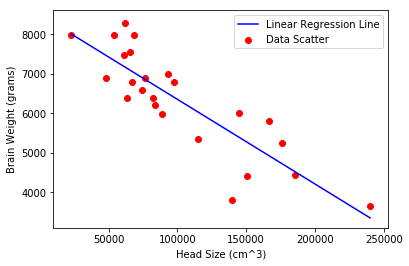

In [38]:
def plot_data(X, y, b0, b1):
    x_max = np.max(X) + 100
    x_min = np.min(X) - 100
    x = np.linspace(x_min, x_max, 1000)
    y = b0 + b1 * x
    plt.plot(x, y, color='#0000ff', label='Linear Regression Line')
    plt.scatter(X, Y, color='#ff0000', label='Data Scatter')
    plt.xlabel('Head Size (cm^3)')
    plt.ylabel('Brain Weight (grams)')
    plt.legend()
    plt.show()

In [30]:
def gradientDescentLinearRegression(x, Y, alpha=0.047,iter=5000):
    theta0 = []
    theta1 = []
    costs = []
    theta = np.zeros(2)
    for i in range(iter):
        pred = predict(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:, 1]).mean()
        
        theta = np.array([t0,t1])
        J = calculate_cost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')

Iteration: 1,Cost = 4.831137096252525e+24,theta = [2.97596167e+02 2.73964187e+07]


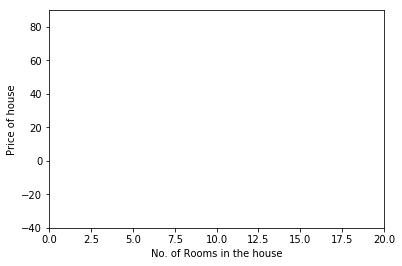

/Users/ikachko/vcub/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning:

invalid value encountered in double_scalars



Iteration: 1001,Cost = nan,theta = [nan nan]


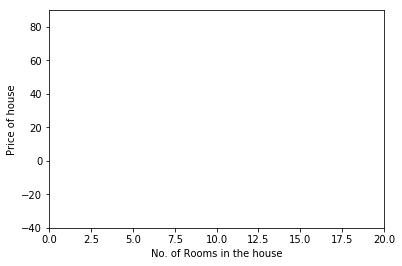

Iteration: 2001,Cost = nan,theta = [nan nan]


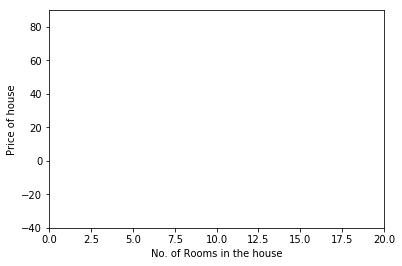

Iteration: 3001,Cost = nan,theta = [nan nan]


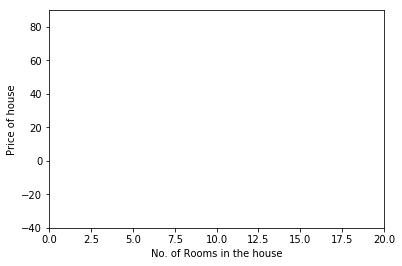

Iteration: 4001,Cost = nan,theta = [nan nan]


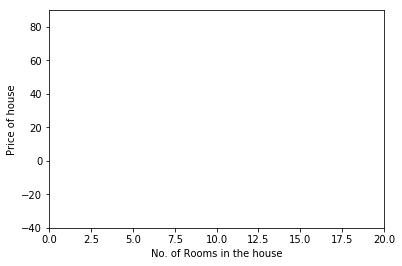

theta0 = 5000
theta1 = 5000
Costs = 5000


In [31]:
gradientDescentLinearRegression(X, y)

In [12]:
def MSE(X, Y, f, teta):
    distance = 0
    for xi, yi in zip(X, Y):
        distance += (yi - f(xi, teta)) ** 2
    return distance

In [15]:
print(pre)

1002264926


In [35]:
def learn(X, y, teta, epochs=500, learning_rate=0.1):
    m = len(X)
    learning_data = []
    for _ in range(epochs):
        
        tmp_teta = np.zeros(2)
        dteta0 = 0
        dteta1 = 0
        for xi, yi in zip(X, y):
            dteta0 += predict(xi, teta) - yi
            dteta1 += (predict(xi, teta) - yi) * xi
        tmp_teta[0] = learning_rate * (1 / m) * dteta0
        tmp_teta[1] = learning_rate * (1 / m) * dteta1
        teta = tmp_teta
        errors = MSE(X, y, predict, teta)
        learning_data.append([_, teta, errors])
    return tmp_teta, learning_data


In [38]:
new_teta, learning_data = learn(X, y, new_teta, epochs=5)

In [39]:
print(learning_data)

[[0, array([-inf, -inf]), inf], [1, array([-inf, -inf]), inf], [2, array([-inf, -inf]), inf], [3, array([-inf, -inf]), inf], [4, array([-inf, -inf]), inf]]


In [18]:
def plot_regression_line(X, y, teta):
    plt.scatter(X, y, color = "m", 
               marker = "o", s = 30)
    y_pred = predict(X, teta)
    plt.plot(X, y_pred, color='g')
    
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.show() 

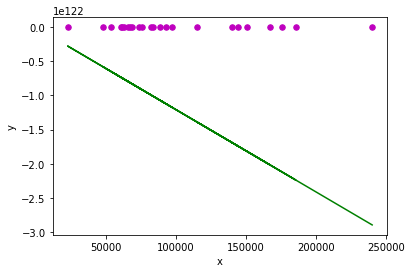

In [34]:
plot_regression_line(X, y, new_teta)

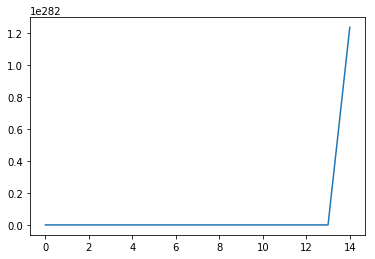

In [73]:
indexes = list(l[0] for l in learning_data)
errors = list(l[2] for l in learning_data)
plt.plot(indexes, errors)